In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
data = pd.read_csv("countries_1.csv") 
#data.head()
data_2007 = data[data.year == 2007]

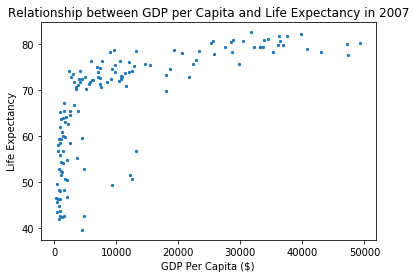

In [4]:
plt.scatter(data_2007.gdpPerCapita, data_2007.lifeExpectancy, 5)
plt.title("Relationship between GDP per Capita and Life Expectancy in 2007")
plt.xlabel("GDP Per Capita ($)")
plt.ylabel("Life Expectancy")
plt.show()

In [5]:
#find the correlation between the life expectancy and gdp per capita
data_2007.lifeExpectancy.corr(data_2007.gdpPerCapita)
# life expectancy and gdp per capita r highly correlated.

0.6786623986777587

In [6]:
#as you can see the correlation is not linear.  life expectancy goes up very quickly at the lower part of GDP per capita.  
#as the gdp goes up, it has less effect on life expectancy in those countries.  gdp that under 10k as a large increase while 
#between 30k to 40k has little change. So instead of using linear scale, we use a log scale to compare.
np.log10([10,100,1000])

array([1., 2., 3.])

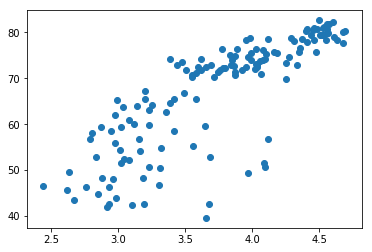

In [8]:
plt.scatter(np.log10(data_2007.gdpPerCapita), data_2007.lifeExpectancy)
plt.show()

In [9]:
#more highly correlated using the log10 form, more accurate model.

0.8089802514849209

In [10]:
#now run this senario in each year.
year_sorted = sorted(set(data.year)) #with sorted year list

[1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002, 2007]

In [18]:
year_sorted = sorted(set(data.year))
for given_year in year_sorted:
    data_year = data[data.year == given_year]
    plt.scatter(data_year.gdpPerCapita, data_year.lifeExpectancy, 5)
    plt.title(given_year)
    plt.xlim(0, 60000)
    plt.ylim(25, 85)
    plt.xlabel("GDP per Capita ($)")
    plt.ylabel("Life Expectancy")
    #let's set a consistence range of gdp and life expectancy in order to compare as now they r all showing different ranges.
    #plt.show()
    #instead of showing the graphs, exporting them as png files
    plt.savefig(str(given_year), dpi=200) #dpi = dots per inch. First arguement is setting the name of the files. 
    #got to be string.
    #Figures shown that GDP per capita was below 20k in early year.  As years go by, GDP increases as the life expectancy has
    #signaficant increase simultaneously.
    
    #savefig got to be called before show().  otherwise, save the figure in fig1
    #fig1 = plt.gcf()
    #plt.show()
    #plt.draw()
    #fig1.savefig(str(given_year), dpi=200)
    
    plt.clf() #we need this line to clear the current plot

<Figure size 432x288 with 0 Axes>

In [19]:
#Earlier there is one country has one more than 60k GDP in one year.  let's find out.
data[data.gdpPerCapita > 60000]

,country,continent,year,lifeExpectancy,population,gdpPerCapita
852,Kuwait,Asia,1952,55.565,160000,108382.35290
853,Kuwait,Asia,1957,58.033,212846,113523.13290
854,Kuwait,Asia,1962,60.470,358266,95458.11176
855,Kuwait,Asia,1967,64.624,575003,80894.88326
856,Kuwait,Asia,1972,67.712,841934,109347.86700


In [22]:
year_sorted = sorted(set(data.year))
for given_year in year_sorted:
    data_year = data[data.year == given_year]
    plt.scatter(np.log10(data_year.gdpPerCapita), data_year.lifeExpectancy, 5) #using log10
    plt.title(given_year)
    plt.xlim(2, 5) #??
    plt.ylim(25, 85)
    plt.xlabel("GDP per Capita (in log scale)")
    plt.ylabel("Life Expectancy")
    #let's set a consistence range of gdp and life expectancy in order to compare as now they r all showing different ranges.
    #plt.show()
    #instead of showing the graphs, exporting them as png files
    plt.savefig("log" + str(given_year), dpi=200) 
    plt.clf()

<Figure size 432x288 with 0 Axes>